In [60]:
"""
Here we import all of the necessary functions and packages that we
won't be defining in our code. 
Sympy: a computer algebra package in python which allows us to perform
       algebraic manipulations easily.
Numpy: a package used for matrix algebra and basic mathematical functions
Matplotlib: a plotting packaged which allows us to make sick figures"""
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.functions.elementary.exponential import exp
from sympy.functions.elementary.trigonometric import sin, cos, tan
from sympy.diffgeom import Manifold, Patch, CoordSystem
from sympy.diffgeom import metric_to_Riemann_components as Riemann
from sympy.diffgeom import metric_to_Ricci_components as Ricci
from sympy.diffgeom import metric_to_Christoffel_2nd as Christoffel
from sympy import latex
from IPython.display import display, Math
import sympy.diffgeom as diffgeom
from sympy.tensor.array import MutableDenseNDimArray as mArray

In [2]:
def print_nonzero_christoffels(metric, component_list):
# given a metrix and a list of coordinates in the form ['t', 'x', 'y', 'z']
# prints out all of the non-zero Christoffel symbols in the form Gamma^c1_c2, c3
    print('********************** Christoffel Symbols **********************')
    christoffels = Christoffel(metric)
    size = len(component_list)
    for i in range(1):
        for j in range(size):
            for k in range(size):
                simplified = simplify(christoffels[i, j, k])
                if simplified != 0:
                    print(component_list[i] + ', ' + component_list[j] + ', ' + component_list[k] + ':   ')
                    display(Math(latex(simplified)))
                    print('---------------------------------')
    print('*****************************************************************')
    return;

def print_nonzero_riemann(R, component_list):
# R is the riemann tensor
# component list is the list of indices of R in the form ['t', 'x', 'y', 'z']
# prints out R^c1_c2,c3,c4
    print('************************* Riemann Tensor *************************')
    n = np.shape(R)[0]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for q in range(n):
                    simplified = simplify(R[i, j, k, q])
                    if simplified != 0:
                        print(component_list[i] + ', ' + component_list[j] + ', ' + component_list[k] + ', '
                              + component_list[q] + ':   ')
                        display(Math(latex(simplify(simplified))))
                        print('---------------------------------')
    print('******************************************************************')
    return;

def print_nonzero_ricci(R, component_list):
# R is the Ricci tensor
# component list is the list of coordinates in the form ['t', 'x', 'y', 'z']
# prints out R_c1, c2
    print('************************* Ricci Tensor *************************')
    n = np.shape(R)[0]
    for i in range(n):
        for j in range(n):
            simplified = simplify(R[i, j])
            if simplified != 0:
                print(component_list[i] + ', ' + component_list[j])
                display(simplified)
                print('---------------------------------')
    print('******************************************************************')
    return;

def print_ricci_scalar(g):
# finds and prints the Ricci scalar
    R = Ricci(g)
    metric_matrix = diffgeom.twoform_to_matrix(g)
    metric_inv = metric_matrix.inv()
    ricci_scalar = 0
    for i in range(np.shape(R)[0]):
        for j in range(np.shape(R)[0]):
            ricci_scalar += metric_inv[i, j] * R[i, j]
    print('************************** Ricci Scalar **************************')
    display(Math(latex(simplify(ricci_scalar))))
    print('******************************************************************')
    return;

def get_ricci_scalar(g):
# finds and prints the Ricci scalar
    R = Ricci(g)
    metric_matrix = diffgeom.twoform_to_matrix(g)
    metric_inv = metric_matrix.inv()
    ricci_scalar = 0
    for i in range(np.shape(R)[0]):
        for j in range(np.shape(R)[0]):
            ricci_scalar += metric_inv[i, j] * R[i, j]

    return ricci_scalar;

def print_nonzero_einstein(metric, component_list):
    ricci_tensor = Ricci(metric)
    ricci_scalar = get_ricci_scalar(metric)
    metric_matrix = diffgeom.twoform_to_matrix(metric)
    term1 = ricci_tensor 
    term2 = - Rational(1 / 2) * metric * ricci_scalar
    #einstein = term1 + term2
    display(Math(latex(simplify(term1))))
    display(Math(latex(simplify(term2))))
    #print('************************* Einstein Tensor *************************')
    #for i in range(np.shape(einstein_tensor)[0]):
    #    for j in range(np.shape(einstein_tensor[1])):
    #        
    #print('*******************************************************************')

In [3]:
## Schwarzschild Metric
t, r, theta, phi, M, c = symbols('t, r, theta, phi, M, c')
m = Manifold('M', 4)
patch = Patch('P', m)
coords = CoordSystem('coords', patch, ['t', 'r', 'theta', 'phi'])
t, r, theta, phi = coords.coord_functions()
dt, dr, dtheta, dphi = coords.base_oneforms()

# make my metric
TP = diffgeom.TensorProduct
metric = - (1 - 2 * M / r) * c**2 * TP(dt, dt) + (1 / (1 - 2 * M / r)) * TP(dr, dr) + r**2 * TP(dtheta, dtheta) + r**2 * sin(theta)**2 * TP(dphi, dphi)
components = ['t', 'r', 'theta', 'phi']
print_nonzero_christoffels(metric, components)
#print_nonzero_riemann(Riemann(metric), components)
#print_nonzero_ricci(Ricci(metric), components)
#print_ricci_scalar(Ricci(metric), metric)
#print_nonzero_einstein(metric, components)

********************** Christoffel Symbols **********************
t, t, r:   


<IPython.core.display.Math object>

---------------------------------
t, r, t:   


<IPython.core.display.Math object>

---------------------------------
*****************************************************************


In [44]:
geodesic_equations = []
tau = Symbol('tau')

#T = Function('T')(tau)
#R = Function('R')(tau)
#Theta = Function('Theta')(tau)
#Phi = Function('Phi')(tau)

T, R, Theta, Phi = symbols('T, R, Theta,  Phi', cls=Function)
my_functions = [T, R, Theta, Phi]
schwarzchild_christoffels = Christoffel(metric)

geoT = T.diff(tau, tau) + (1 / (R * (R - Rational(2)))) * T.diff(tau) * R.diff(tau) \
                        + (1 / (R * (R - Rational(2)))) * R.diff(tau) * T.diff(tau)
#display(geoT)

geoR = R.diff(tau, tau)
#display(geoR)

geoTheta = Theta.diff(tau, tau)
#display(geoTheta)

geoPhi = Phi.diff(tau, tau)
#display(geoPhi)

eq = (Eq(Derivative(T(tau), tau, tau), Derivative(R(tau), tau) * Derivative(T(tau), tau)),
      Eq(Derivative(R(tau), tau, tau), 0))


dsolve(eq, (T, R))
#display(dsolve(geoTheta))
#display(dsolve(geoPhi))




TypeError: as_base_exp() missing 1 required positional argument: 'self'

In [59]:
tau = Symbol('tau')
T, R, T_, R_ = symbols('T, R, T_, R_', cls=Function)

eq = (Eq(Derivative(T_(tau),tau), -(2*M / (R(tau)**2 - 2*M*R(tau))) * T_(tau) * R_(tau)),
      Eq(Derivative(R_(tau),tau), 0),
      Eq(Derivative(T(tau), tau), T_(tau)),
      Eq(Derivative(R(tau), tau), R_(tau)))

dsolve(eq)

NotImplementedError: 

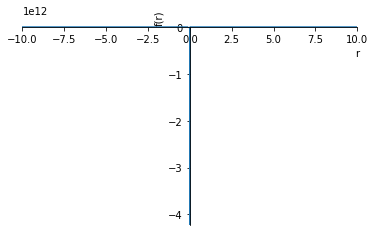

In [65]:
signewt = 1
r, ell = symbols('r, ell')
ell = 5.

V = -1/r + ell**2 * (1/r)**2 / 2 - signewt * ell**2 * (1/r)**3;
p1 = plot(V, show=False)
p1.show()